In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [215]:
# Load the passenger data
passengers = pd.read_csv("train.csv")
passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [216]:
# convert sex to numerical (female=1, male=1)
passengers['Sex'] = ((passengers['Sex']=='female').astype(int))

In [217]:
# check for nan values
passengers.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [218]:
# fill Age with mean age
passengers['Age'] = passengers['Age'].fillna(passengers['Age'].mean())

In [219]:
# split passengers by class using 'Pclass'

passengers['FirstClass'] = (passengers['Pclass'] ==1).astype(int)
passengers['SecondClass'] = (passengers['Pclass'] ==2).astype(int)
passengers['ThirdClass'] = (passengers['Pclass'] ==3).astype(int)

In [220]:
# check all worked
passengers.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
FirstClass       0
SecondClass      0
ThirdClass       0
dtype: int64

In [221]:
passengers.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstClass,SecondClass,ThirdClass
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.25,NaN,S,0,0,1


In [222]:
# check for correlations with surivival - note sort by absolute values so not seeing pos/neg
correlations = passengers.corrwith(passengers.Survived).abs().sort_values()
correlations

PassengerId    0.005007
SibSp          0.035322
Age            0.069809
Parch          0.081629
SecondClass    0.093349
Fare           0.257307
FirstClass     0.285904
ThirdClass     0.322308
Pclass         0.338481
Sex            0.543351
Survived       1.000000
dtype: float64

Text(0.5, 1.0, 'Count of features with strong correlations with Survived')

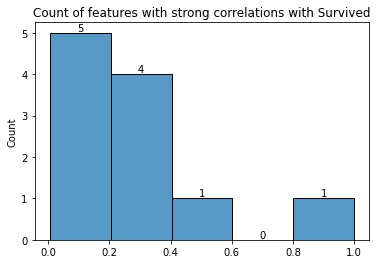

In [229]:
ax = sns.histplot(correlations)
ax.bar_label(ax.containers[0])
plt.title("Count of features with strong correlations with Survived")

Not super helpful, but does show that only 1 feature correlates with with survival even 50% of the time

In [191]:
# codeacademy want Sex, Age, FirstClass, and SecondClass so here we go
features = passengers[["Sex", "Age", "FirstClass", "SecondClass"]]
# I'll choose Sex, Pclass and Fare
features_me = passengers[["Sex", "Age", "Fare"]]

In [192]:
# split both
X_train, X_test, y_train, y_test = train_test_split(features, passengers["Survived"], test_size=0.25, random_state = 26)
X_train_me, X_test_me, y_train_me, y_test_me = train_test_split(features_me, passengers["Survived"], test_size=0.25, random_state = 26)

In [193]:
# check for lengths are the same
print(X_train.shape, y_train.shape)
print(X_train_me.shape, y_train_me.shape)

(668, 4) (668,)
(668, 3) (668,)


Since sklearn‘s Logistic Regression implementation uses Regularization, we need to scale our feature data. Create a StandardScaler object, .fit_transform() it on the training features, and .transform() the test features.

In [194]:
# Scale the feature data so it has mean = 0 and standard deviation = 1
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)
scaler_me = StandardScaler()
X_train_me_norm = scaler_me.fit_transform(X_train_me)
X_test_me_norm = scaler_me.transform(X_test_me)


In [195]:
# crete and train model(s!)

logreg = LogisticRegression()
lrmodel = logreg.fit(X_train_norm, y_train)

logreg_me = LogisticRegression()
lrmodel_me = logreg_me.fit(X_train_me_norm, y_train)

In [196]:
# score models
print("CA's model accuracy on train data: {:.3f}".format(lrmodel.score(X_train_norm, y_train)))
print("CA's model accuracy on test data: {:.3f}".format(lrmodel.score(X_test_norm, y_test)))
print("My model accuracy on train data: {:.3f}".format(lrmodel_me.score(X_train_me_norm, y_train)))
print("My model accuracy on test data: {:.3f}".format(lrmodel_me.score(X_test_me_norm, y_test)))

CA's model accuracy on train data: 0.786
CA's model accuracy on test data: 0.780
My model accuracy on train data: 0.786
My model accuracy on test data: 0.771


In [197]:
print("CA's feature selection:")
for i in range(len(features.columns)):
    print(features.columns[i], lrmodel.coef_[0][i])

CA's feature selection:
Sex 1.268773706782143
Age -0.4453627597649696
FirstClass 1.070746758379249
SecondClass 0.49029701654370583


In [198]:
print("My feature selection:")
for i in range(len(features_me.columns)):
    print(features_me.columns[i], lrmodel_me.coef_[0][i])

My feature selection:
Sex 1.1673850933671097
Age -0.13568132048792
Fare 0.7539754806819511


Sex clearly the strongest feature in both models.  
First Class a strong predictor in CA's feature set.  
Fare fairly important in my feature set.

Age an inverse predictor in both feature sets - interestingly given more weight in theirs, even though model accuracies are similar.

In [199]:
# predictions!
# Sample passenger features
Jack = np.array([0.0,20.0,0.0,0.0])
Rose = np.array([1.0,17.0,1.0,0.0])
You = np.array([0.0,38.0,0.0,0.1])

In [200]:
# Combine passenger arrays
sample_passengers = np.concatenate([[Jack, Rose, You]]) # double square brackets to convert to 2D array
sample_passengers

array([[ 0. , 20. ,  0. ,  0. ],
       [ 1. , 17. ,  1. ,  0. ],
       [ 0. , 38. ,  0. ,  0.1]])

In [201]:
# Scale the sample passenger features
sample_passengers_norm = scaler.transform(sample_passengers)
sample_passengers_norm

/Users/learning/opt/miniconda3/envs/std/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.73669883, -0.75179616, -0.56351951, -0.52886055],
       [ 1.35740679, -0.98160054,  1.77456145, -0.52886055],
       [-0.73669883,  0.62703009, -0.56351951, -0.28688874]])

In [205]:
predictions = lrmodel.predict(sample_passengers_norm)
predictions

array([0, 1, 0])

In [204]:
np.set_printoptions(suppress=True) # this shows numbers instead of scientific notation
lrmodel.predict_proba(sample_passengers_norm)

array([[0.88823874, 0.11176126],
       [0.03954722, 0.96045278],
       [0.92879436, 0.07120564]])

In [214]:
names = ["Jack", "Rose", "Sorry, but Chris"]

for i in range(len(names)):
    if predictions[i] == 0:
        print("{} is going to die".format(names[i]))
    if predictions[i] == 1:
        print("{} is going to survive, whoop whoop".format(names[i]))

Jack is going to die
Rose is going to survive, whoop whoop
Sorry, but Chris is going to die
